In [107]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-college-statistics-dataset/College Data.csv


# 🎓 Global College Statistics Analysis

[![Kaggle Profile](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/crissyro)
[![GitHub Profile](https://img.shields.io/badge/GitHub-Profile-black?style=for-the-badge&logo=github)](https://github.com/crissyro)

## 🔍 Overview
This project analyzes the [Global College Statistics Dataset](https://www.kaggle.com/datasets/sameerk2004/global-college-statistics-dataset) to explore various aspects of higher education colleges worldwide. The dataset includes information on tuition fees, student demographics, college rankings, and more.

## 📈 Objectives
- Perform **data cleaning** and preprocessing
- Explore **tuition trends** and cost variations by country
- Analyze **student demographics** and enrollment patterns
- Study the correlation between **university rankings** and tuition fees
- Apply **machine learning models** to predict placement rates
- Visualize key insights with **interactive plots**
- Provide a summary of **higher education trends globally**

## 🛠 Methods & Tools
- **Python Libraries:** `pandas`, `numpy`, `matplotlib`, `seaborn`, `plotly`, `scikit-learn`, `xgboost`
- **Data Cleaning:** Handling missing values, standardizing data formats
- **Exploratory Data Analysis (EDA):** Statistical summaries, correlation matrices
- **Feature Engineering:** Encoding categorical features, scaling numerical features
- **Machine Learning:** Regression models to predict student placement rates
- **Visualization:** Interactive charts using `plotly` and `seaborn`

## 🌍 Dataset Description
The dataset contains:
- **College ID** —  Unique identifier for each college
- **Country** — The country where the college is located
- **Total Students** — The total number of students in the college, randomly generated between 1,000 and 30,000
- **Male** — The number of male students in the college, randomly generated between 500 and 15,000
- **Female** — he number of female students in the college, randomly generated between 500 and 15,000, ensuring the total number of male and female students does not exceed the total student count.
- **CGPA** — The average CGPA (Cumulative Grade Point Average) of students in the college, generated with a normal distribution, with a mean of 7.5 and a standard deviation of 1.0. It is adjusted based on annual family income
- **Annual Family Income** — The average annual family income of students in the college, randomly generated between 200,000 and 5,000,000 units of currency
- **Branch** — The branch of study chosen by students in the college (e.g., Computer Science, Mechanical Engineering, etc.)
- **Sports** —  The sports activity most popular in the college 
- **Placement Rate** — The percentage of students who get placed in jobs, randomly generated between 60% and 100%. It is adjusted based on the number of research papers published
- **Faculty Count** — The number of faculty members in the college, randomly generated between 50 and 500, adjusted based on the total number of students

### **Make import the necessary libraries 📚 and also make some settings for visualization 📊 and ignoring errors 🚫**

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from plotly.offline import init_notebook_mode
import warnings

init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-pastel')
sns.set_theme(style='whitegrid')

### **Read dataset in dataframe with pandas 🐼 and check count of rows and columns**

In [109]:
df = pd.read_csv('/kaggle/input/global-college-statistics-dataset/College Data.csv')

print(df.shape)
df.head()

(50000, 12)


,College ID,Country,Total Students,Male,Female,CGPA,Annual Family Income,Branch,Sports,Research Papers Published,Placement Rate,Faculty Count
0,College 52,UK,27002,2593,11644,10.000000,3574250,Physics,Swimming,39,100.00,655
1,College 93,Switzerland,11913,9392,2521,6.951278,762556,Chemical Engineering,Athletics,31,68.84,256
2,College 15,Japan,15644,5475,4388,9.327922,1795845,Business Administration,Volleyball,37,91.99,555
3,College 72,Singapore,13239,7363,5876,8.681112,1222223,Physics,Tennis,48,97.98,455
4,College 61,Canada,10236,13339,-3103,8.560567,1921133,Biotechnology,Athletics,34,83.56,310


### **Clear dataset from unnormal objects 🧑‍💻**

In [110]:
df = df[(df['Female'] > 0) & (df['Male'] > 0)]

print(df.shape)
df.head()

(38447, 12)


,College ID,Country,Total Students,Male,Female,CGPA,Annual Family Income,Branch,Sports,Research Papers Published,Placement Rate,Faculty Count
0,College 52,UK,27002,2593,11644,10.000000,3574250,Physics,Swimming,39,100.00,655
1,College 93,Switzerland,11913,9392,2521,6.951278,762556,Chemical Engineering,Athletics,31,68.84,256
2,College 15,Japan,15644,5475,4388,9.327922,1795845,Business Administration,Volleyball,37,91.99,555
3,College 72,Singapore,13239,7363,5876,8.681112,1222223,Physics,Tennis,48,97.98,455
5,College 21,USA,22804,4373,2757,9.112827,1885655,Chemical Engineering,Basketball,30,85.50,439


### **General info about dataset 🖼️**

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38447 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   College ID                 38447 non-null  object 
 1   Country                    38447 non-null  object 
 2   Total Students             38447 non-null  int64  
 3   Male                       38447 non-null  int64  
 4   Female                     38447 non-null  int64  
 5   CGPA                       38447 non-null  float64
 6   Annual Family Income       38447 non-null  int64  
 7   Branch                     38447 non-null  object 
 8   Sports                     38447 non-null  object 
 9   Research Papers Published  38447 non-null  int64  
 10  Placement Rate             38447 non-null  float64
 11  Faculty Count              38447 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 3.8+ MB


### **Describe dataset numeric and category values** 

In [112]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Total Students,38447.0,1.848169e+04,7.062020e+03,1003.000000,1.321700e+04,1.887700e+04,2.440000e+04,29999.0
Male,38447.0,6.961480e+03,4.112551e+03,500.000000,3.356500e+03,6.583000e+03,1.033600e+04,14999.0
Female,38447.0,6.032469e+03,3.911126e+03,1.000000,2.696000e+03,5.450000e+03,8.990000e+03,14999.0
CGPA,38447.0,8.700303e+00,1.054550e+00,4.001559,7.970690e+00,8.799474e+00,9.648148e+00,10.0
Annual Family Income,38447.0,2.610475e+06,1.386571e+06,200004.000000,1.409922e+06,2.618865e+06,3.809124e+06,4999988.0
Research Papers Published,38447.0,2.449502e+01,1.444534e+01,0.000000,1.200000e+01,2.400000e+01,3.700000e+01,49.0
Placement Rate,38447.0,8.235487e+01,1.146950e+01,60.030000,7.250000e+01,8.249000e+01,9.247000e+01,100.0
Faculty Count,38447.0,4.587704e+02,1.480259e+02,67.000000,3.460000e+02,4.590000e+02,5.730000e+02,796.0


In [113]:
df.describe(include='object').T

,count,unique,top,freq
College ID,38447,100,College 17,430
Country,38447,10,Switzerland,3890
Branch,38447,10,Physics,3958
Sports,38447,9,Volleyball,4371


### Check null values 0️⃣

In [114]:
df.isnull().sum()

College ID                   0
Country                      0
Total Students               0
Male                         0
Female                       0
CGPA                         0
Annual Family Income         0
Branch                       0
Sports                       0
Research Papers Published    0
Placement Rate               0
Faculty Count                0
dtype: int64

## **Data visualization** 📊

### 1. General pairplor for all dataset 

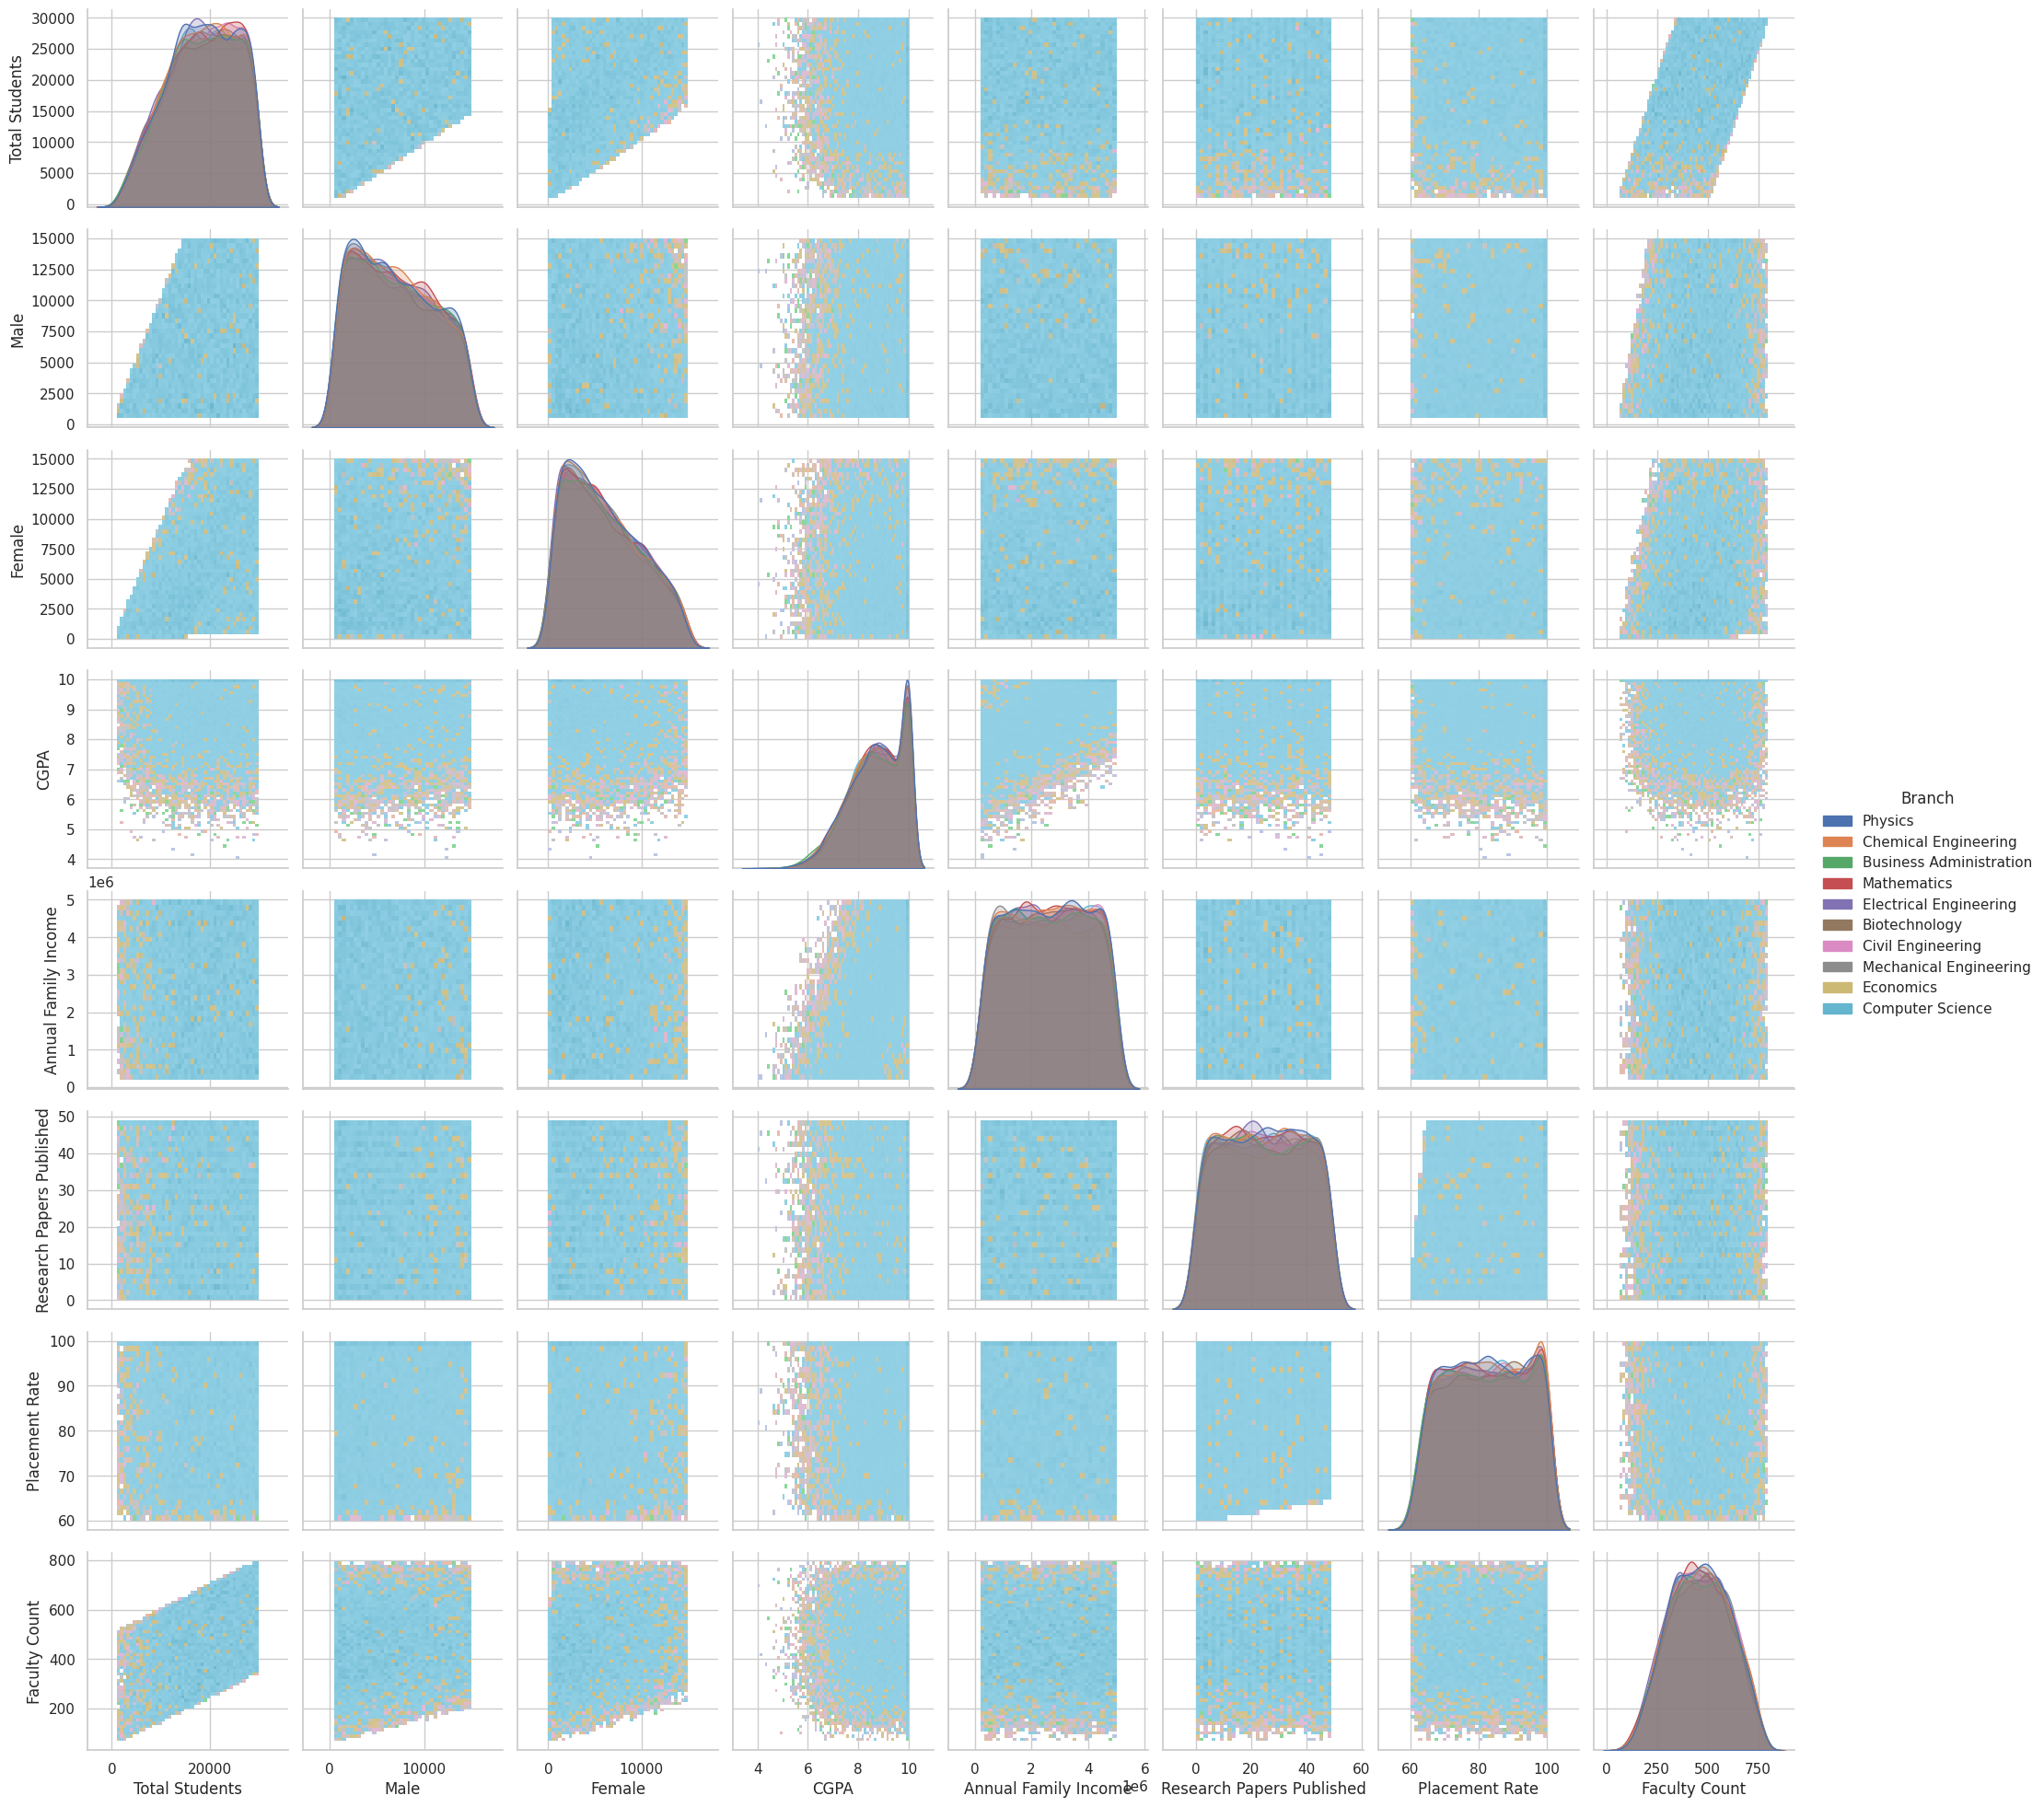

In [115]:
sns.pairplot(data=df, kind='hist', diag_kind='kde', hue='Branch');

### 2. General histogram for dataset 

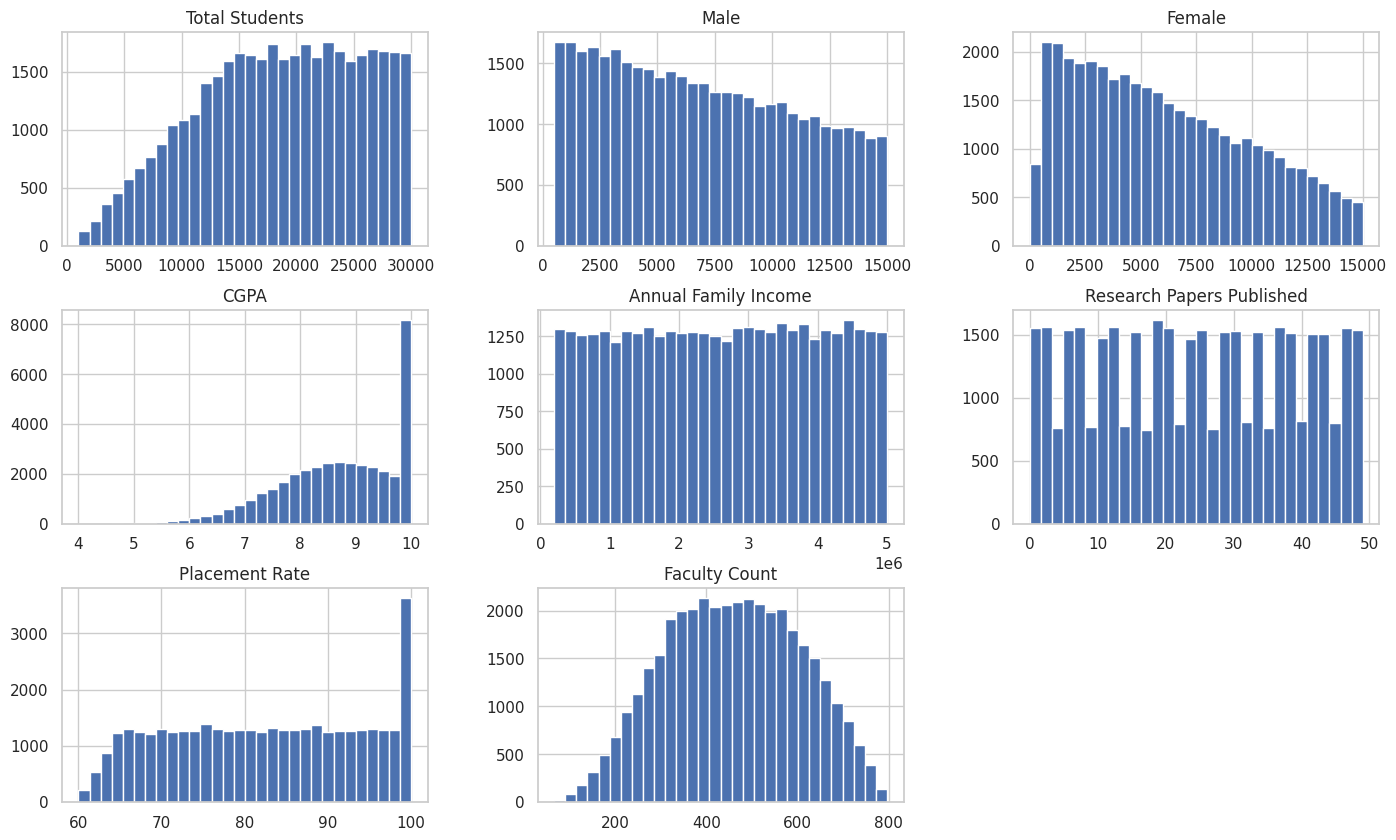

In [116]:
df.hist(bins=30, figsize=(17, 10));

### 3. Count colleges in country 🌍

In [117]:
gr = df.groupby(['Country', 'Branch'])['College ID'].count().reset_index(name='cnt')

fig = px.bar(gr, x='Country', y='cnt', template='ggplot2', animation_frame='Branch')
fig.show(renderer='iframe_connected')

### 4. Sports distribution ⚽

In [118]:
gr = df.groupby(['Country', 'Sports'])['College ID'].count().reset_index(name='cnt')
fig = px.pie(gr, names='Sports', values='cnt', template='ggplot2')
fig.show(renderer='iframe_connected')

### 5. College ranking dependence on number of scientific papers 🧑‍🔬👩‍🔬

In [119]:
fig = px.scatter(df, x="Placement Rate", y="Research Papers Published", animation_frame='Country', template='ggplot2')
fig.show(renderer='iframe_connected')

### 6. Checking emissions

In [120]:
fig = px.box(df, x="Research Papers Published", y="Placement Rate", animation_frame='Country', template='ggplot2')
fig.show(renderer='iframe_connected')

### 7. Theoretically important parameters that form the rating 

In [121]:
fig = px.scatter_3d(df, x='Research Papers Published', y='Placement Rate', z='CGPA', 
                    color='Country', animation_frame='Branch', template='ggplot2')
fig.show(renderer='iframe_connected')

In [122]:
fig = px.histogram(df, x='Placement Rate', y='Total Students', color='Branch')
fig.show(renderer='iframe_connected')

In [123]:
fig = px.bar(df, x='Country', y='CGPA', title='Средний CGPA по странам', color='Branch' ,template='ggplot2')
fig.show(renderer='iframe_connected')

### 8. Correlation matrix

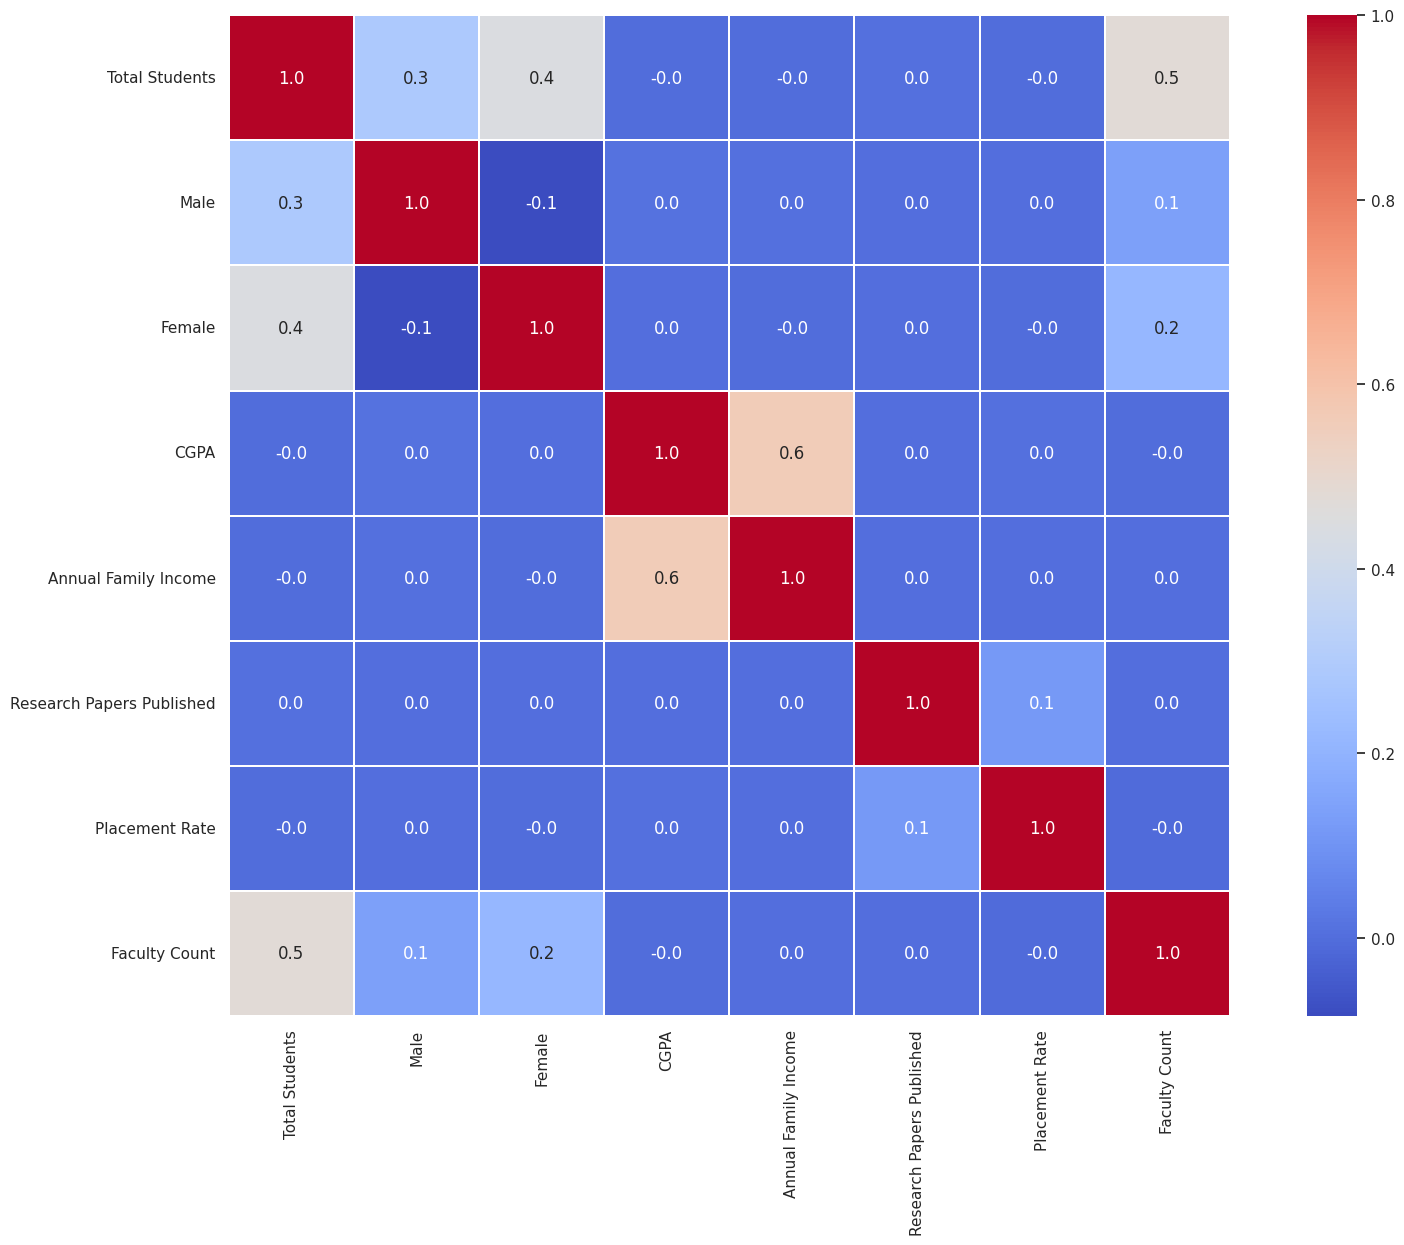

In [124]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(20, 13))
sns.heatmap(correlation_matrix, square=True,
            annot=True, fmt='.1f', linewidths=0.1, cmap='coolwarm');

## 💡 Machine Learning Approach
### 1. **Feature Selection & Preprocessing**
- Removed unnecessary columns: `College ID`, `Total Students`
- Defined categorical and numerical features
- Applied **Target Encoding** to categorical features
- Passed numerical features without modification

In [125]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm

In [126]:
X = df.drop(['College ID', 'Placement Rate', 'Total Students'], axis=1) 
y = df['Placement Rate']

categorical_features = ['Country', 'Branch', 'Sports']
numerical_features = ['Male', 'Female', 'CGPA', 'Annual Family Income', 
                      'Research Papers Published', 'Faculty Count']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', TargetEncoder(), categorical_features),
        ('num', 'passthrough', numerical_features)
    ])

models = {
    'Random Forest': RandomForestRegressor(n_jobs=-1, random_state=42),
    'XGBoost': XGBRegressor(n_jobs=-1, n_estimators=200,
            learning_rate=0.05,
            max_depth=4,
            subsample=0.8,
            colsample_bytree=0.9),
    'Linear Regression': LinearRegression(n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
}

### 2. **Model Training & Validation**
We trained multiple regression models to predict **placement rates**:
- **Random Forest Regressor**
- **XGBoost Regressor**
- **Linear Regression**
- **Gradient Boosting Regressor**

Each model was trained using **cross-validation**, and performance was evaluated using:
- **R² Score** (Coefficient of Determination)
- **Mean Absolute Error (MAE)**
- **Mean Squared Error (MSE)**

In [127]:
for name, model in tqdm(models.items(), desc="Обучение моделей"):  
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    with tqdm(total=2, desc=f"Кросс-валидация ({name})", leave=False) as pbar_cv:
        scores = cross_val_score(pipeline, X, y, cv=2, scoring='r2')
        pbar_cv.update(2)
    
    if name == 'XGBoost':
        pipeline.fit(X, y, regressor__verbose=False)  
    else:
        pipeline.fit(X, y)
    
    y_pred = pipeline.predict(X)
    
    results.append({
        'Model': name,
        'R2 Score': r2_score(y, y_pred),
        'MAE': mean_absolute_error(y, y_pred),
        'MSE': mean_squared_error(y, y_pred)
    })
    
    if hasattr(model, 'feature_importances_'):
        feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
        importances = pipeline.named_steps['regressor'].feature_importances_
        fig = px.bar(x=importances, y=feature_names, orientation='h', 
                     title=f'Importance of Features ({name})', template='ggplot2')
        fig.show(renderer='iframe_connected')

Кросс-валидация (Random Forest): 100%|██████████| 2/2 [00:13<00:00,  6.62s/it]
                                                                              

Кросс-валидация (XGBoost): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]
                                                                        

Кросс-валидация (Gradient Boosting): 100%|██████████| 2/2 [00:08<00:00,  4.44s/it]
                                                                                  

Обучение моделей: 100%|██████████| 4/4 [00:48<00:00, 12.20s/it]


### 3. **Model Evaluation & Feature Importance**
- The best-performing model was identified based on **R² Score**.
- **Feature Importance** was analyzed to determine which factors impact placement rates the most.
- Results were visualized using **bar plots**.

In [128]:
results_df = pd.DataFrame(results).sort_values('R2 Score', ascending=False)
fig = px.bar(results_df, x='Model', y='R2 Score', 
            title='Model performance comparison (R²)', template='ggplot2')
fig.show(renderer='iframe_connected')

### 4. **Results**
- Model performance comparison chart

In [129]:
print("Model evaluation results:\n")
print(results_df)

Model evaluation results:

                Model  R2 Score       MAE         MSE
20      Random Forest  0.857974  3.693065   18.682991
0       Random Forest  0.857974  3.693065   18.682991
6       Random Forest  0.857974  3.693065   18.682991
16      Random Forest  0.857974  3.693065   18.682991
12      Random Forest  0.857974  3.693065   18.682991
7             XGBoost  0.049464  9.700697  125.039330
21            XGBoost  0.049464  9.700697  125.039330
1             XGBoost  0.049464  9.700697  125.039330
13            XGBoost  0.049464  9.700697  125.039330
17            XGBoost  0.049464  9.700697  125.039330
23  Gradient Boosting  0.029829  9.804135  127.622213
9   Gradient Boosting  0.029829  9.804135  127.622213
19  Gradient Boosting  0.029829  9.804135  127.622213
15  Gradient Boosting  0.029829  9.804135  127.622213
3   Gradient Boosting  0.029829  9.804135  127.622213
18  Linear Regression  0.014350  9.885889  129.658392
22  Linear Regression  0.014350  9.885889  129.658392
2

## 📢 Contributions
Feel free to contribute! Open a PR or discuss improvements in the Issues section.

## 🔗 References
- [Kaggle Dataset](https://www.kaggle.com/datasets/sameerk2004/global-college-statistics-dataset)
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Seaborn Documentation](https://seaborn.pydata.org/)
- [Scikit-learn Documentation](https://scikit-learn.org/stable/)